## Baseline Scenario

#### Fixed Split:

- Bandwidth: 50% to user equipment, 50% to sensors
- Computational power: 50% to user equipment, 50% to sensors

In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt

# predefined smart city scenario
from mobile_env.scenarios.smart_city import MComSmartCity

In [2]:
env = gym.make("mobile-smart_city-smart_city_handler-v0", render_mode="rgb_array")

print(f"\nSmart city environment with {env.NUM_USERS} users, {env.NUM_SENSORS} sensors and {env.NUM_STATIONS} cells.")


Smart city environment with 5 users, 20 sensors and 1 cells.


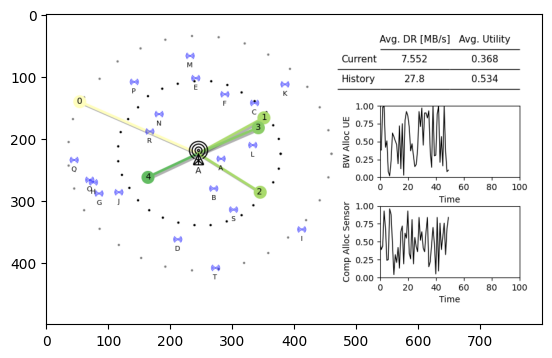

In [ ]:
from IPython import display
import cProfile
import pstats

profiler = cProfile.Profile()
done = False
obs, info = env.reset()
total_episode_reward = 0
total_reward_over_time = []

for _ in range(50):
    dummy_action = (0.50, 0.50)
    
    # Profile the step function
    profiler.enable()
    obs, reward, terminated, truncated, info = env.step(dummy_action)
    profiler.disable()
    
    total_episode_reward += reward
    total_reward_over_time.append(total_episode_reward)

    print(info)

    plt.imshow(env.render())
    display.display(plt.gcf())
    display.clear_output(wait=True)

In [ ]:
# load all tracked results as pandas data frames
scalar_results, ue_results, bs_results, ss_results = env.monitor.load_results()

# show general results
scalar_results

,number UE connections,number sensor conncections,bandwidth allocation UE,bandwidth allocation sensor,computational allocation UE,computational allocation sensor,delayed UE packets,delayed sensor packets,reward,episode reward,mean utility,mean utility sensor,mean datarate,mean datarate sensor
Time Step,,,,,,,,,,,,,,
0,5,20,0.24,0.76,0.40,0.60,0,0,10.00,10.00,0.225071,0.725534,4.150705,193.824622
1,5,20,0.59,0.41,0.41,0.59,0,0,19.50,29.50,0.429980,0.614914,10.501786,104.913040
2,5,20,0.41,0.59,0.58,0.42,0,0,0.00,29.50,0.355096,0.682757,7.156077,150.383977
3,5,20,0.60,0.40,0.44,0.56,0,0,28.52,58.02,0.442650,0.610150,10.536844,102.386272
4,5,20,0.86,0.14,0.19,0.81,0,0,9.50,67.53,0.527195,0.402760,15.077657,36.204206
5,5,20,0.87,0.13,0.93,0.07,2,0,25.20,92.72,0.537263,0.377223,15.546953,31.988769
6,5,20,0.35,0.65,0.90,0.10,0,0,0.00,92.72,0.340876,0.698970,6.116255,165.095195
7,5,20,0.70,0.30,0.84,0.16,0,2,23.62,116.34,0.495399,0.554683,12.225361,77.087448
8,5,20,0.51,0.49,0.97,0.03,0,0,15.92,132.27,0.435828,0.647964,9.135715,124.243292


In [ ]:
ue_results

Metric           AoRI  AoSI  distance UE-station  user queue size  \
Time Step UE ID                                                     
0         0       0.0   0.0            58.457556              0.0   
          1       NaN   NaN           110.874807              1.0   
          2       NaN   NaN           122.207981              0.0   
          3       NaN   NaN            94.300447              0.0   
          4       NaN   NaN            75.313075              1.0   
...               ...   ...                  ...              ...   
49        0       5.0  25.0            93.442628              3.0   
          1       NaN   NaN            37.846843              0.0   
          2      18.0  42.0            80.051845              4.0   
          3       1.0  59.0            31.279722              0.0   
          4       1.0  29.0            72.841350              0.0   

Metric               user snr  user throughput  user utility  
Time Step UE ID                                               
0         0      3.297589e-07        11.185981      0.524337  
          1      4.067912e-08         1.379905      0.069925  
          2      2.992387e-08         1.015069      0.003248  
          3      6.969728e-08         2.364250      0.186847  
          4      1.417477e-07         4.808321      0.340997  
...                       ...              ...           ...  
49        0      6.948548e-08         7.182198      0.428129  
          1      1.551587e-06       160.375861      1.000000  
          2      1.238745e-07        12.803983      0.553673  
          3      2.889674e-06       298.683748      1.000000  
          4      1.646807e-07        17.021817      0.615503  

[250 rows x 7 columns]

In [ ]:
ss_results

Metric               distance sensor-station  sensor queue size    sensor snr  \
Time Step Sensor ID                                                             
0         0                        16.492423                0.0  2.503599e-05   
          1                        30.083218                0.0  3.288423e-06   
          2                        57.280014                0.0  3.736486e-07   
          3                        70.611614                0.0  1.843187e-07   
          4                        61.032778                0.0  3.015702e-07   
...                                      ...                ...           ...   
49        15                       74.027022                0.0  1.571410e-07   
          16                       89.140339                2.0  8.390842e-08   
          17                       39.357337                0.0  1.326987e-06   
          18                       51.478151                0.0  5.359168e-07   
          19                       92.779308                6.0  7.330285e-08   

Metric               sensor throughput  sensor utility  
Time Step Sensor ID                                     
0         0                2762.631935        1.000000  
          1                 362.869636        1.000000  
          2                  41.231299        0.807614  
          3                  20.339159        0.654166  
          4                  33.277602        0.761076  
...                                ...             ...  
49        15                  6.428154        0.404043  
          16                  3.432435        0.267801  
          17                 54.282908        0.867332  
          18                 21.922702        0.670447  
          19                  2.998594        0.238459  

[1000 rows x 5 columns]

In [ ]:
bs_results

,Metric,accomplished UE jobs queue size,accomplished sensor jobs queue size,station throughput,transferred UE jobs queue size,transferred sensor jobs queue size
Time Step,BS ID,,,,,
0,0,1.0,9.0,3897.245961,0.0,11.0
1,0,3.0,20.0,2150.769734,0.0,16.0
2,0,3.0,26.0,3043.459927,0.0,32.0
3,0,6.0,38.0,2100.409649,0.0,41.0
4,0,7.0,56.0,799.472403,2.0,34.0
5,0,13.0,56.0,717.510147,0.0,49.0
6,0,13.0,56.0,3332.485177,0.0,79.0
7,0,16.0,58.0,1602.875754,0.0,92.0
8,0,18.0,58.0,2530.544419,0.0,117.0


In [ ]:
# Display profiling results
stats = pstats.Stats(profiler)
stats.sort_stats("cumulative").print_stats(20)  # Show top 20 functions by cumulative time

         11984079 function calls (11885369 primitive calls) in 3.554 seconds

   Ordered by: cumulative time
   List reduced from 1198 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       50    0.000    0.000    3.554    0.071 /Users/elifohri/Library/Python/3.9/lib/python/site-packages/gymnasium/wrappers/order_enforcing.py:52(step)
       50    0.000    0.000    3.554    0.071 /Users/elifohri/Library/Python/3.9/lib/python/site-packages/gymnasium/wrappers/env_checker.py:43(step)
       50    0.004    0.000    3.553    0.071 /Users/elifohri/Documents/mobile-env/mobile_env/core/base.py:506(step)
   107036    0.056    0.000    1.994    0.000 /Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/logging/__init__.py:1436(info)
   107036    0.059    0.000    1.925    0.000 /Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/logging/__init__.py:

In [ ]:
#profiler.dump_stats("step_function_profile.prof")

In [ ]:
#stats = pstats.Stats("step_function_profile.prof")
#stats.sort_stats("cumulative").print_stats(90)

In [ ]:
#profiler.dump_stats("step_function_profile.prof")
